# Reading data
* We will only consider csv files
* Starting with FSU data file provided by Copa

## Objective
* How to read and treat data encountered for the first time
* Look at types
* Look at undefined data

# Use magic commands (%)

# When modifying libraries, no need to restart the kernel
%load_ext autoreload
%autoreload 2

In [1]:
# Make sure the paths are set correctly, either via sys.path or using 
# the PYTHONPATH environment variable.
import sys
sys.path

['/Users/erlebach/Dropbox/Copa_excel_files_python/copa/Rosetta Stone_Copa',
 '/Users/erlebach/Dropbox/Copa_excel_files_python/copa',
 '/usr/lib',
 '/Users/erlebach/Dropbox/Copa_excel_files_python/copa/Rosetta Stone_Copa',
 '/Users/erlebach/opt/anaconda3/envs/copa/lib/python39.zip',
 '/Users/erlebach/opt/anaconda3/envs/copa/lib/python3.9',
 '/Users/erlebach/opt/anaconda3/envs/copa/lib/python3.9/lib-dynload',
 '',
 '/Users/erlebach/opt/anaconda3/envs/copa/lib/python3.9/site-packages',
 '/Users/erlebach/opt/anaconda3/envs/copa/lib/python3.9/site-packages/pgmpy-0.1.14-py3.9.egg',
 '/Users/erlebach/opt/anaconda3/envs/copa/lib/python3.9/site-packages/IPython/extensions',
 '/Users/erlebach/.ipython']

In [2]:
# Make sure the default directory is as expected
!pwd    # pwd() is an alternative

/Users/erlebach/Dropbox/Copa_excel_files_python/copa/Rosetta Stone_Copa


In [3]:
# Check environment variable PYTHONPATH
import os
os.environ['PYTHONPATH']

'/Users/erlebach/Dropbox/Copa_excel_files_python/copa:/usr/lib:'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import src.copa.util_functions as u

In [17]:
# Setup Pandas to display more columns, wider columns. 
# Limit number precision to two significant digits
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.max_seq_items', 100)
pd.set_option('display.precision', 2)

# This function is defined in util_functions.setPandasOptions

## Starting with the FSU Table
* I will assume no knowledge of the file

## Open the file
* Analyze its structure
* How many missing variables
* Column types
* Dates

In [6]:
fsu = pd.read_csv("../data/Copa-FSU-02172021.csv")

/Users/erlebach/opt/anaconda3/envs/copa/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,4,5,15,16,17,18,21,22,23,24,31,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
fsu

,ACTUAL_BLOCK_HR,AIRCRAFT_TYPE,AIRLINE_DESIGNATOR_CD,ARR_DELAY_INTERVAL,ARR_DELAY_MINUTES,ARR_DELAY_MINUTES_DV,BANK OVERALL,BANK_CD,BASE_CD,CANCEL_CD,CANCEL_REASON_DESCRIPTION,CAPACITY_C_CNT,CAPACITY_CNT,CAPACITY_Y_CNT,CLAVLOCOD,COUNT_ARR00,COUNT_ARR14,COUNT_ARR15,COUNT_ARR90,COUNT_ATB,COUNT_CANCELLATIONS,COUNT_DEP00,COUNT_DEP05,COUNT_DEP15,COUNT_DEP80,COUNT_DIVERSION,COUNT_DLY_FLTS_ARR00,COUNT_DLY_FLTS_ARR14,COUNT_DLY_FLTS_D3H,COUNT_DLY_FLTS_DEP00,COUNT_GTB,CREW_CNT,DEP_DELAY_INTERVAL,DEP_DELAY_MINUTES,DEST_CD,DWHLOAD_DTML,ETA_DTMZ,ETD_DTMZ,FLT_ACTUAL_HR,FLT_NUM,FLT_TYPE_CD,FLT_TYPE_NAME,FOD,FOD_REAL,HUB_STN,IN_DTMZ,LEG_STATUS_CD,MONTH,OD,OFF_DTMZ,ON_DTMZ,OPERATED_ALL,OPERATED_CNT,OPERATED_CNT_ALL,ORIG_CD,ORIGIN_PLANNED,OUT_DTMZ,Q,ROTATION_@STATION,ROTATION_AVAILABLE_TM,ROTATION_PLANNED_TM,ROTATION_REAL_TM,SCH_ARR_DTL,SCH_ARR_DTML_PTY,SCH_ARR_DTMZ,SCH_ARR_DTZ,SCH_ARR_TML_PTY,SCH_ARR_TMZ,SCH_BLOCK_HR,SCH_DEP_DTL,SCH_DEP_DTML_PTY,SCH_DEP_DTMZ,SCH_DEP_DTZ,SCH_DEP_TML_PTY,SCH_DEP_TMZ,SCH_DEST_CD,SCHD_CNT_ALL,SCHEDULED_ALL,SCHEDULED_CNT,TAIL,TAXI_IN_MINUTES,TAXI_OUT_MINUTES,TIPO_OPR,WEEK,YEAR,AC_OWNER_CARRIER_CD,AIRCRAFT_TYPE_ICAO,FUENTE,IN,ON,OUT,OFF
0,0.80,700,CM,-3:02,-182.00,-182.00,Off Bank,Off Bank,CMP,0.0,?,12.0,124.0,112.0,T,1.00,1.00,1.00,1.00,0.0,0.0,1.00,1.00,1.00,1.00,0.0,0.0,0.0,0.0,0.0,1.0,6.00,-0:11,-11.00,MEX,2/15/2020 09:53:37.000,2/15/2020 15:19:00.000,?,?,195,J,GTB,195MEXMEX,195MEXMEX,INTRACAM,2/15/2020 12:28:00.000,5.0,2/1/2020,MEXMEX,?,?,1.0,0.0,1.0,MEX,MEX,2/15/2020 11:40:00.000,Q1,?,?,?,?,2/15/2020,2/15/2020 10:30:00.000,2/15/2020 15:30:00.000,2/15/2020,10:30:00.000000,15:30:00.000000,3.65,2/15/2020,2/15/2020 06:51:00.000,2/15/2020 11:51:00.000,2/15/2020,06:51:00.000000,11:51:00.000000,MEX,1.0,1.0,0.0,HP1530,?,?,GTB,7,2020,CM,B737,TERADATA,12:28:00.000000,?,11:40:00.000000,?
1,4.07,800,CM,0:26,26.00,26.00,B6,B6 Dep,CMP,0.0,?,16.0,160.0,144.0,T,0.00,0.00,0.00,1.00,0.0,0.0,1.00,1.00,1.00,1.00,0.0,1.0,1.0,0.0,0.0,0.0,7.00,-0:01,-1.00,LIM,2/13/2020 09:15:48.000,2/13/2020 05:49:00.000,?,3.18,337,J,Schedule,337PTYLIM,337PTYLIM,HUB,2/13/2020 06:26:00.000,0.0,2/1/2020,PTYLIM,2/13/2020 02:38:00.000,2/13/2020 05:49:00.000,1.0,1.0,1.0,PTY,PTY,2/13/2020 02:22:00.000,Q1,PTY,80,67,79,2/13/2020,2/13/2020 01:00:00.000,2/13/2020 06:00:00.000,2/13/2020,01:00:00.000000,06:00:00.000000,3.62,2/12/2020,2/12/2020 21:23:00.000,2/13/2020 02:23:00.000,2/13/2020,21:23:00.000000,02:23:00.000000,LIM,1.0,1.0,1.0,HP1852,37.00,16.00,1,7,2020,CM,B738,TERADATA,06:26:00.000000,05:49:00.000000,02:22:00.000000,02:38:00.000000
2,2.02,800,CM,0:02,2.00,2.00,B3,B3 Dep,CMP,0.0,?,16.0,160.0,144.0,T,0.00,1.00,1.00,1.00,0.0,0.0,1.00,1.00,1.00,1.00,0.0,1.0,0.0,0.0,0.0,0.0,6.00,0:00,0.00,TGU,12/6/2019 13:30:31.000,12/6/2019 18:15:00.000,?,1.48,426,J,Schedule,426PTYTGU,426PTYTGU,HUB,12/6/2019 18:23:00.000,0.0,12/1/2019,PTYTGU,12/6/2019 16:45:00.000,12/6/2019 18:14:00.000,1.0,1.0,1.0,PTY,PTY,12/6/2019 16:22:00.000,Q4,PTY,91,80,91,12/6/2019,12/6/2019 13:21:00.000,12/6/2019 18:21:00.000,12/6/2019,13:21:00.000000,18:21:00.000000,1.98,12/6/2019,12/6/2019 11:22:00.000,12/6/2019 16:22:00.000,12/6/2019,11:22:00.000000,16:22:00.000000,TGU,1.0,1.0,1.0,HP1856,9.00,23.00,1,49,2019,CM,B738,TERADATA,18:23:00.000000,18:14:00.000000,16:22:00.000000,16:45:00.000000
3,1.63,E90,CM,0:49,49.00,49.00,B4,B4 Dep,CMP,0.0,?,10.0,94.0,84.0,T,0.00,0.00,0.00,1.00,1.0,0.0,0.00,0.00,0.00,1.00,0.0,1.0,1.0,0.0,1.0,0.0,5.00,0:21,21.00,PTY,10/22/2019 18:12:55.000,10/22/2019 00:00:00.000,10/22/2019 21:50:00.000,1.03,15,J,ATB,15PTYPTY,15PTYPTY,HUB,10/22/2019 23:00:00.000,6.0,10/1/2019,PTYPTY,10/22/2019 21:50:00.000,10/22/2019 22:52:00.000,1.0,0.0,1.0,PTY,PTY,10/22/2019 21:22:00.000,Q4,?,?,?,?,10/22/2019,10/22/2019 17:11:00.000,10/22/2019 22:11:00.000,10/22/2019,17:11:00.000000,22:11:00.000000,1.17,10/22/2019,10/22/2019 16:01:00.000,10/22/2019 21:01:00.000,10/22/2019,16:01:00.000000,21:01:00.000000,PTY,1.0,1.0,0.0,HP1568,8.00,28.00,ATB,43,2019,CM,E190,TERADATA,23:00:00.000000,22:52:00.000000,

* Look at the columns and shape (54k rows and 92 columns)
* Look at types

In [8]:
fsu.columns, fsu.shape

(Index(['ACTUAL_BLOCK_HR', 'AIRCRAFT_TYPE', 'AIRLINE_DESIGNATOR_CD',
        'ARR_DELAY_INTERVAL', 'ARR_DELAY_MINUTES', 'ARR_DELAY_MINUTES_DV',
        'BANK OVERALL', 'BANK_CD', 'BASE_CD', 'CANCEL_CD',
        'CANCEL_REASON_DESCRIPTION', 'CAPACITY_C_CNT', 'CAPACITY_CNT',
        'CAPACITY_Y_CNT', 'CLAVLOCOD', 'COUNT_ARR00', 'COUNT_ARR14',
        'COUNT_ARR15', 'COUNT_ARR90', 'COUNT_ATB', 'COUNT_CANCELLATIONS',
        'COUNT_DEP00', 'COUNT_DEP05', 'COUNT_DEP15', 'COUNT_DEP80',
        'COUNT_DIVERSION', 'COUNT_DLY_FLTS_ARR00', 'COUNT_DLY_FLTS_ARR14',
        'COUNT_DLY_FLTS_D3H', 'COUNT_DLY_FLTS_DEP00', 'COUNT_GTB', 'CREW_CNT',
        'DEP_DELAY_INTERVAL', 'DEP_DELAY_MINUTES', 'DEST_CD', 'DWHLOAD_DTML',
        'ETA_DTMZ', 'ETD_DTMZ', 'FLT_ACTUAL_HR', 'FLT_NUM', 'FLT_TYPE_CD',
        'FLT_TYPE_NAME', 'FOD', 'FOD_REAL', 'HUB_STN', 'IN_DTMZ',
        'LEG_STATUS_CD', 'MONTH', 'OD', 'OFF_DTMZ', 'ON_DTMZ', 'OPERATED_ALL',
        'OPERATED_CNT', 'OPERATED_CNT_ALL', 'ORIG_CD', 'ORIGIN_

In [9]:
fsu.dtypes   # Fully displayed. Use head(n) to restrict

ACTUAL_BLOCK_HR               object
AIRCRAFT_TYPE                 object
AIRLINE_DESIGNATOR_CD         object
ARR_DELAY_INTERVAL            object
ARR_DELAY_MINUTES             object
ARR_DELAY_MINUTES_DV          object
BANK OVERALL                  object
BANK_CD                       object
BASE_CD                       object
CANCEL_CD                    float64
CANCEL_REASON_DESCRIPTION     object
CAPACITY_C_CNT               float64
CAPACITY_CNT                 float64
CAPACITY_Y_CNT               float64
CLAVLOCOD                     object
COUNT_ARR00                   object
COUNT_ARR14                   object
COUNT_ARR15                   object
COUNT_ARR90                   object
COUNT_ATB                    float64
COUNT_CANCELLATIONS          float64
COUNT_DEP00                   object
COUNT_DEP05                   object
COUNT_DEP15                   object
COUNT_DEP80                   object
COUNT_DIVERSION              float64
COUNT_DLY_FLTS_ARR00         float64
C

In [10]:
fsu.describe()

,CANCEL_CD,CAPACITY_C_CNT,CAPACITY_CNT,CAPACITY_Y_CNT,COUNT_ATB,COUNT_CANCELLATIONS,COUNT_DIVERSION,COUNT_DLY_FLTS_ARR00,COUNT_DLY_FLTS_ARR14,COUNT_DLY_FLTS_D3H,COUNT_DLY_FLTS_DEP00,COUNT_GTB,FLT_NUM,LEG_STATUS_CD,OPERATED_ALL,OPERATED_CNT,OPERATED_CNT_ALL,SCH_BLOCK_HR,SCHD_CNT_ALL,SCHEDULED_ALL,SCHEDULED_CNT,WEEK,YEAR
count,5.41e+04,54074.0,54074.00,54074.00,5.41e+04,5.41e+04,5.41e+04,54074.00,54074.00,5.41e+04,54074.00,5.41e+04,54074.00,54074.00,54074.00,54074.00,54074.00,54074.00,54074.00,54074.0,54074.00,54074.00,54074.00
mean,1.59e-03,13.5,142.52,129.03,2.40e-04,1.48e-03,2.37e-03,0.26,0.08,4.55e-03,0.18,2.50e-03,850.62,0.02,1.00,0.99,1.00,3.33,1.00,1.0,0.99,29.19,2019.40
std,3.98e-02,4.2,25.02,23.76,1.55e-02,3.84e-02,4.86e-02,0.44,0.27,6.73e-02,0.38,4.99e-02,1681.39,0.30,0.04,0.10,0.06,1.97,0.05,0.0,0.09,20.52,0.49
min,0.00e+00,0.0,94.00,84.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00e+00,15.00,0.00,0.00,0.00,0.00,0.33,0.00,1.0,0.00,1.00,2019.00
25%,0.00e+00,12.0,124.00,112.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00e+00,230.00,0.00,1.00,1.00,1.00,1.72,1.00,1.0,1.00,6.00,2019.00
50%,0.00e+00,16.0,154.00,138.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00e+00,390.00,0.00,1.00,1.00,1.00,2.68,1.00,1.0,1.00,42.00,2019.00
75%,0.00e+00,16.0,160.00,144.00,0.00e+00,0.00e+00,0.00e+00,1.00,0.00,0.00e+00,0.00,0.00e+00,642.00,0.00,1.00,1.00,1.00,4.20,1.00,1.0,1.00,47.00,2020.00
max,1.00e+00,16.0,186.00,186.00,1.00e+00,1.00e+00,1.00e+00,1.00,1.00,1.00e+00,1.00,1.00e+00,7680.00,6.00,1.00,1.00,1.00,10.78,1.00,1.0,1.00,52.00,2020.00


In [11]:
# Only shows numeric columns
fsu.describe().T

,count,mean,std,min,25%,50%,75%,max
CANCEL_CD,54074.0,1.59e-03,0.04,0.00,0.00,0.00,0.0,1.00
CAPACITY_C_CNT,54074.0,1.35e+01,4.20,0.00,12.00,16.00,16.0,16.00
CAPACITY_CNT,54074.0,1.43e+02,25.02,94.00,124.00,154.00,160.0,186.00
CAPACITY_Y_CNT,54074.0,1.29e+02,23.76,84.00,112.00,138.00,144.0,186.00
COUNT_ATB,54074.0,2.40e-04,0.02,0.00,0.00,0.00,0.0,1.00
COUNT_CANCELLATIONS,54074.0,1.48e-03,0.04,0.00,0.00,0.00,0.0,1.00
COUNT_DIVERSION,54074.0,2.37e-03,0.05,0.00,0.00,0.00,0.0,1.00
COUNT_DLY_FLTS_ARR00,54074.0,2.64e-01,0.44,0.00,0.00,0.00,1.0,1.00
COUNT_DLY_FLTS_ARR14,54074.0,8.06e-02,0.27,0.00,0.00,0.00,0.0,1.00
COUNT_DLY_FLTS_D3H,54074.0,4.55e-03,0.07,0.00,0.00,0.00,0.0,1.00


## Look at Unique Values

In [12]:
fsu.WEEK.value_counts().sort_index().head()

1    2524
2    2561
3    2550
4    2527
5    2498
Name: WEEK, dtype: int64

## Total number of days

In [13]:
nb_days = fsu.groupby('SCH_DEP_DTZ')['FLT_NUM'].size().shape
nb_days

(153,)

## Flight numbers: 
* sort_values: shows that some flights have a single flight. 
* sort_values: shows that there are two flights a day in many cases (there are only 153 days)
* sort_index: shows that some flight numbers are very low and very high

In [14]:
fsu.FLT_NUM.value_counts().sort_values().tail(10)

407    263
686    272
687    274
145    301
144    304
392    305
787    306
163    306
788    306
391    307
Name: FLT_NUM, dtype: int64

In [15]:
fsu.FLT_NUM.value_counts().sort_index().tail(10)

7231    18
7248    48
7249    48
7252    29
7253    43
7254    14
7310    13
7311    11
7432     1
7680     1
Name: FLT_NUM, dtype: int64

Let us plot the flight numbers

<AxesSubplot:>

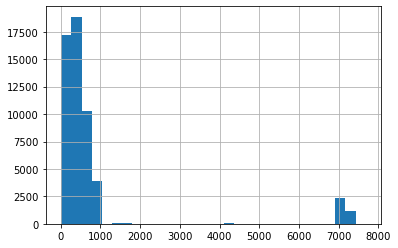

In [16]:
fsu.FLT_NUM.hist(bins=30)

We observe that there are two main regions. Let us magnify: 

In [ ]:
fsu.FLT_NUM.hist(bins=30)
plt.ylim(0, 100)

At this point, the Copa team informs me to only consider flights between 1 and 1000.
* So we delete flight numbers greater than 999 

In [ ]:
fsu.loc[:, 'FLT_NUM'] = fsu[fsu['FLT_NUM'] < 1000]

In [ ]:
# The flights have been removed. Always check your calculations. 
fsu.FLT_NUM.hist(bins=30)
plt.ylim(0,100)

## Most columns are objects
* Many should be floats or integers
* Look at MONTH (string), a WEEK (int), YEAR (int) 
* What is the MONTH of? Departure, arrival, something else? 
* Find lines where departure and arrival occur on separate days
* From the list below, there is no way to tell. 
    * ==> Ignore MONTH column

In [ ]:
# Departure and arrivals are sometimes on different dates
# Questions: is the difference ever more than unity?
fsux = fsu[fsu['SCH_DEP_DTL'] != fsu['SCH_ARR_DTL']]
fsux[['SCH_DEP_DTL','SCH_ARR_DTL','MONTH','WEEK','YEAR']].head(3)

* So I must be able to subtract dates. This leads to the need of having functions to simplify the process. 

### MONTH is incorrectly encoded
* Remove MONTH from the DataFrame. We'll renmove WEEK and YEAR as well. 
* Easiest way: convert datetimes to nanoseconds, in integer format
    * In this formation, conversion to other formats is extremely fast

In [ ]:
fsu['SCH_DEP_DTZ'].head()

Immedate observation: this will create a problem with sorting in string format: 
* the following inequality should be True, but is not. 
* Reason the dates are sometimes one sometimes two digits

In [ ]:
"2/15/2020" < "12/15/2020"

Write some utilities to transform dates to nanoseconds and back

In [ ]:
def to_nanoseconds(date):
    return pd.to_datetime(date).astype(int)

Notice how long this takes (for 50,000 rows)

In [ ]:
%%time 
nano = to_nanoseconds(fsu.SCH_DEP_DTMZ)

In [ ]:
%%time
pd.to_datetime(nano).dt.strftime('%Y/%m/%d')

Execution time is about 10x faster. 
* All strings are formatted identically. 
* Comparisons will work properly

## How to convert columns to integers and floats, but not by hand
* Date conversions are done in cleanupColumns() methods in src/copa/utils_function.py
    * I do this in the function cleanupColumns() in utils_function

Utility function for date conversion (found in util_functions.py)

In [ ]:
# Create a function to automate this process. Will be required multiple times
# Once the function is debugged, transfer it to a library of functions (utils_function.py)
def series_to_date_components(series, prefix="", suffix=""):
    """
    Decomposes a date column into day, week, dayofweek, month, year
    
        Parameters:
            series (DataSeries): A date column of a dataframe as a string or integer
            prefix (string): prefix added to column names [default: ""]
            suffix (string): suffix added to column names [default: ""]
            
        Return (DataFrame): a dataframe with the day, week, dayofweek, 
            month, year as columns
    """
    
    date = pd.to_datetime(series)
    month = date.dt.month
    year = date.dt.year
    day = date.dt.day
    week = date.dt.isocalendar().week
    dayofweek = date.dt.dayofweek
    titles = np.asarray(['d','w','dw','mo','y'])
    t = list(map(lambda x: (prefix+x+suffix), titles))  # Anonymous function
    df = pd.DataFrame({t[0]:day, t[1]:week, t[2]: dayofweek, t[3]:month, t[4]:year})
    return df

day = series_to_date_components(fsu['SCH_DEP_DTZ'], prefix='schdepz_')
day

In [ ]:
# While we are at it, create a function to extract time comopnents
def series_to_time_components(series, prefix="", suffix=""):
    """
    Decomposes a date columns into hours/min
    
        Parameters:
            series (DataSeries): A date column of a dataframe as a string
            prefix (string): prefix added to column names [default: ""]
            suffix (string): suffix added to column names [default: ""]
            
         Return (DataFrame): a dataframe with the day, week, dayofweek, 
            month, year as column
    """
    
    date = pd.to_datetime(series)
    hour = date.dt.hour
    minute = date.dt.minute
    titles = np.asarray(['h','mi'])
    t = list(map(lambda x: (prefix+x+suffix), titles))
    df = pd.DataFrame({t[0]:hour, t[1]:minute})
    return df

time = series_to_time_components(fsu['SCH_DEP_TMZ'], prefix='schdep_')
time

### The two functions were added to src/copa/util_functions.py for use in other notebooks

## Iterate
* As we continue to explore the data, we iterate on the cleanup process
* Below is a function in util_functions.py to cleanup the data
* As the function becomes more complex, it can broken up into simpler functions that are reusable. 
* The current cleanupColumn() has improvements
    * all DTMZ columns have been converted to datetime and then int
    * Undefined datas have been converted to a single date: Jan 1, 1960
    * Undefined dates are detected by the number by a negative value for the number of nanoseconds 
        * Dates normally have an origin sometime in 1970.
* Many string fields are trimmed. I found that Copa airlines 'CM' was actually stored as 'CM ' . Notice the space as the last character, which is invisible. 
* All question marks (?) are converted to NaN
    * Must choose NaN versus None versus null versus an integer or float imputation
    * NaN is a good choice because it considered as a float, and is ignored during various  calculations unless we specify otherwise. 

In [ ]:
def cleanupColumns(df1):
    """
    cleanupColumns(df)

    Cleanup the columns of the FSU tables provided by Copa in Jan. 2021.
    No columns are deleted. Character columns are stripped (blank spaces removed in front and back).
    Some columns are converted to int.
    Time columns (DTMZ) only keep hours and minutes.
    Date columns are changed so that the dates are sortable (yyyy/mm/dd) as strings.

    Return: modified dataframe.
    """
    df = df1.copy()
    non_converted = []

    # Strip 'object' or 'str' types
    # Convert other columns to integers after converting NaN
    for col in df.columns:
        if df[col].dtype == 'O' or df[col].dtype == 'str':
            df[col] = df[col].str.strip()
        else:
            try:
                pass
                df[col] = df[col].astype('int')
            except:
                #print(col)
                try:
                    df[col] = df[col].fillna(-1).astype('int')
                    df[col] = df[col].astype('int')
                except:
                    non_converted.append(col)

    df.SCH_DEP_TMZ = df.SCH_DEP_TMZ.str[0:5]
    df.SCH_DEP_DTZ = pd.to_datetime(df.SCH_DEP_DTZ)
    df.SCH_ARR_TMZ = df.SCH_ARR_TMZ.str[0:5]
    df.SCH_ARR_DTZ = pd.to_datetime(df.SCH_ARR_DTZ)

    # Remove extraneous blank space
    df['FOD'] = df['FOD'].str.strip()
    df['FOD_REAL'] = df['FOD_REAL'].str.strip()
    df['OD'] = df['OD'].str.strip()
    df['ORIGIN_PLANNED'] = df['ORIGIN_PLANNED'].str.strip()
    df['ORIG_CD'] = df['ORIG_CD'].str.strip()
    df['DEST_CD'] = df['DEST_CD'].str.strip()

    df['COUNT_ATB'] = df['COUNT_ATB'].astype('int')
    df['COUNT_GTB'] = df['COUNT_GTB'].astype('int')

    df['COUNT_DIVERSION'] = df['COUNT_DIVERSION'].astype('int')

    df['FOD_REAL'] = df['FOD_REAL'].str.strip()
    df['FOD'] = df['FOD'].str.strip()
    df['FLT_NUM'] = df['FLT_NUM'].astype('int')
    df['DEP_DELAY_MINUTES'] = df['DEP_DELAY_MINUTES'].fillna(9999).astype('int')

    df['WEEK'] = df['WEEK'].astype('int')
    df['CAPACITY_CNT'] = df['CAPACITY_CNT'].astype('int')
    df['CREW_CNT'] = df['CREW_CNT'].fillna(0).astype('int')
    df['CAPACITY_C_CNT'] = df['CAPACITY_C_CNT'].astype('int')
    df['CAPACITY_Y_CNT'] = df['CAPACITY_Y_CNT'].astype('int')

    # Drop ETD_DTMZ: 93% of rows are '?'
    df = df.drop(labels='ETD_DTMZ', axis=1)
    df['ETA_DTMZ'] = df['ETA_DTMZ'].replace('?',"0/0/0000 00:00:00.000")
    df['ON_DTMZ'] = df['ON_DTMZ'].replace('?',"0/0/0000 00:00:00.000")
    df['OFF_DTMZ'] = df['OFF_DTMZ'].replace('?',"0/0/0000 00:00:00.000")
    df['ACTUAL_BLOCK_HR'] = df['ACTUAL_BLOCK_HR'].replace('?',-1)
    df['CANCEL_CD'] = df['CANCEL_CD'].replace('?',-1)
    df['CANCEL_CD'] = df['CANCEL_CD'].fillna(-1)
    df['CANCEL_CD'] = df['CANCEL_CD'].astype('int')
    df['CANCEL_REASON_DESCRIPTION'] = df['CANCEL_REASON_DESCRIPTION'].replace('?','-1')

    df.AC_OWNER_CARRIER_CD = df.AC_OWNER_CARRIER_CD.str.strip()

    # Based on the output of pandas_profiling, remove columns where all variables are identical
    df = df.drop(labels=['SCHEDULED_ALL','FUENTE'], axis=1)
    return [df, non_converted]

## Clean the FSU file and save to the Rosetta folder

In [ ]:
# Notice the question mark. These are hard to deal with than NaNs
# NaN are actually considered as floats
# The '?' prevents the column from converting to either float or int
f = fsu['DEP_DELAY_MINUTES']
f[90:100]
ff = f.replace('?', '9999')  # for some fields I convert to int
ff[90:100]   # the '?': on line 95 is gone
# Cannot convert '3.5' to int via astype('int')
# But I can convert '3.0' to int via astype('int')
ff.astype('float').astype('int')  

# Update cleanupColumns()

In [ ]:
print("Number of unknown crew counts: ", (fsu['CREW_CNT'] == '?').sum())
fsu['CREW_CNT']
#must again first convert to float, and then to int. I updated the underlying library

In [ ]:
fsu1 = fsu.copy()

In [ ]:
fsu1.OUT_DTMZ

### Use the cleanupColumns defined in `util_functions.py`

In [ ]:
%%time 
fsu1, non_converted = u.cleanupColumns(fsu)  # Use the underlying library
print(non_converted)
fsu1

Total time to execute cleanupColumns is about 1m 30s. Very long. Mostly due to date conversions. 
* The file has 50,000 rows. If the file had 5 million rows, this would take 100 times longer!
* This is why converting dates to integer once makes sense. 

## Looking at the column, there are several more needed enhancements
* Some of the COUNT columns have NaN (i.e., COUNT_ARR14) ==> replace NaN by -1
* Same idea with COUNT_ARR15, ARR90, DEP00, DEP05, DEP15, DEP80, TAXI_IN_MINUTES, TAX_OUT_MINUTES
* It is not clear whether floats or integers are better. Probably floats if eventually, we move to machine learning and neural networks. 
* BEWARE: conditionals with floats are sometimes tricky. 
    * x = 1.;  x == 1.0 is True most of the time, but not always. Depends on the machine.
    * if x is either 0. or 1., a better test is x > 0.5

* Replace all '?' by -1. Create a function to process all relevant columns

In [ ]:
cols = ['ARR00','ARR14','ARR15','ARR90','DEP00','DEP05','DEP15','DEP80']
# A map() is an iterator. Transform to a list. 
cols1 = list(map(lambda x: 'COUNT_'+x, cols)) 
dfc = fsu[cols1]
fsu2 = fsu.copy()

# Apply a function to every column and return a dataframe
fsu2[cols1] = dfc.apply(lambda x: x.replace('?',-1).astype(float).astype(int))   # Does not work

The faster way to convert '?' to NaN would be: 

In [ ]:
fsu2 = fsu2.replace('?', np.nan)

In [ ]:
fsu2.columns

In [ ]:
(fsu['IN_DTMZ'] == '?').sum()  # 98 values

In [ ]:
(fsu2['IN_DTMZ'] == '?').sum()  #0 values

In [ ]:
# Look at IN. Only keep hours and min.
u.series_to_time_components(fsu2['IN_DTMZ'])  # Crashes because of '?' in the data

In [ ]:
fsu2.head(10)

In [ ]:
# DEP_DELAY_INTERVAL is redundant
fsu3 = fsu2.drop(labels=['DEP_DELAY_INTERVAL','ARR_DELAY_INTERVAL','CANCEL_REASON_DESCRIPTION','DWHLOAD_DTML','ETD_DTMZ',
                         'FOD','FOD_REAL','OPERATED_ALL','OPERATED_CNT_ALL','ROTATION_@STATION','SCH_ARR_DTL',
                         'SCH_ARR_TML_PTY','SCH_DEP_DTL','SCH_DEP_DTML_PTY','SCH_DEP_TML_PTY','WEEK','YEAR','MONTH','FUENTE'], axis=1)

## Simplify columns. Times have the format hh:mm.ss.000.
* Remove .ss.000 to make column content shorter

In [ ]:
# These should be added to the cleanColumns() method
fsu3['IN'] = fsu3['IN'].str[0:5]
fsu3['OUT'] = fsu3['OUT'].str[0:5]
fsu3['OFF'] = fsu3['OFF'].str[0:5]
fsu3['ON'] = fsu3['ON'].str[0:5]
fsu3

In [ ]:
fsu2['IN'] = fsu2['IN'].replace('?', '00:00')
u.series_to_time_components(fsu2['IN'])  # Crashes because of '?' in the dat

# Reload the original FSU files and clean it, and output the result

In [ ]:
fsu = pd.read_csv("../data/Copa-FSU-02172021.csv")
fsu = fsu.iloc[:,:] 

In [ ]:
fsu, not_converted = u.cleanupColumns(fsu)

In [ ]:
fsu.OUT_DTMZ

In [ ]:
fsu.to_csv("data/fsu_clean.csv", index=0)  # Use for plotting

* Return to the cleanup routine for further clean up we might have missed 

In [ ]:
fsu.columns

## List of functions in src/copa/util_functions.py:
* def setPandasOptions():
* def upperToLower(df):
* def getSortedHourCount(series, msg="", nrows=10):
* def cleanupColumns(df1):
* def to_datetime(series):
* def additionalCleanup(df):
* def displayCancellations(df):
* def listDiversions(df):
* def listSpecialFlights(df):
* def filterFlights(df):
* def filterCarriers(df):
* def removeCancellations(df):
* def removeDiversions(df):
* def removeTurnbacks(df):
* def removeOeqD(df):
* def relabelColumnsFSU(fsu):
* def checkUniques(df, max_unique=200, print_unique=30):
* def checkColFloat(df, col_nm):
* def nbNonFloats(df):
* def makeFloatDf(df):
* def connectingFromPaxStatistics(df):
* def connectingToPaxStatistics(df):
* def plotFeederPaxByDates(df_list, ylim=None):
* def plotPaxByDate(df_list, labels, title, ymonth=8000, ylim=None):
* def plotOD(ax, OD, df_od_group):
* def plotDelaysAllFlights():
* def nonFeederDepartures(df, feeders=False):
* def scatter_DepArrDelays(df):
* def scatter_ArrMinusDepDelay(df):
* def ArrDepFltTimeCorr(df):
* def flights_nonfeeders(df):
* def save_all_feeders(potential_feeders):
* def plotFeederHist(dflist, binrange=(0.5,100.5), labels=('', ''), cols=('nb_feeders', 'nb_feeders'), \
*     - title: plot title with a default: "Number of Feeders Histogram".
* def savePivotTables(df):
* def series_to_date_components(series, prefix="", suffix=""):
* def series_to_time_components(series, prefix="", suffix=""):
* def Zulu2PTY(datetime):
* def per_interval(df1, kind='SCHED', bin_size=60, min_delay=None, max_delay=None, title="", ax=None, date=None, daterange=None, desired_timezone='Zulu'):
* def delayByOD(df, delay_range=(None, None), filenm='od_arrival_delays_med,mean,std.csv'):
* def time_2_AM_PM(df, time_col):
* def createIdPair(df1, dest_col, cols, suffixes = ['_f','_nf']):
* def createUniqueIdPairList(df, idcol, cols, suffixes=['_f','_nf']):
* def createId(df1, dest_col, cols):
* def createUniqueIdList(df, idcol, cols):
* def createIdentifiers(fsu, dff, idcol, fsu_cols, dff_cols):
* def noRecordsFound():
* def fsuRecords(df_ids, ids, id_col='id', cols=None):
* def bookingRecords(df_ids, ids, cols=None):
* def aggreggateBookings(dff_ids, dff_id_cols, save_data=False, output="bookings", out_suffix=("_f","_nf")):
* def createMergeIdList(fsu_id, dff_id):
* def mergeFSUBookings(fsu_ids, dff_ids, ids, cols_fsu=None, cols_dff=None):
* def findFeederIds(df, nonfeeder_id):
* def findNonFeederIds(df, feeder_id):